🔹 1. Importing Libraries

Pandas & NumPy → For data handling & numerical computations.
Matplotlib & Seaborn → For visualization.
sklearn.model_selection → Splitting the dataset into training and testing sets.
sklearn.preprocessing → Encoding categorical features & standardizing numerical values.
sklearn.ensemble → Using RandomForestRegressor for regression tasks.
sklearn.linear_model → Includes Linear Regression.
sklearn.svm → SVR (Support Vector Regression) for price prediction.
sklearn.naive_bayes → Using GaussianNB, though it’s typically for classification.
sklearn.metrics → To evaluate models using RMSE and R² score.
REGION_CODES → A dictionary mapping plate codes to regions.


2. Loading & Displaying the Dataset

display(df.head())
display(df.info())
Loads the dataset from "train.csv".
Uses display(df.head()) to show the first 5 rows.
Uses df.info() to check data types & missing values.

3. Cleaning the Data

df = clean_data(df)
Removes duplicate rows using drop_duplicates().
Drops missing values using dropna().
Converts the 'date' column to datetime format for easier manipulation.


4. Mapping Region Codes

Extracts the last 2-3 digits from the plate column using regex (\d{2,3}).
Maps these extracted digits to region names using the REGION_CODES dictionary.
Stores the mapped region name in the new region column.

5. Feature Engineering

df = feature_engineering(df)
Encodes the categorical ‘region’ column into numbers using LabelEncoder().
Extracts features from the plate number:
plate_length → Number of characters in the plate.
has_triple_digits → Whether the plate has a 3-digit number.
has_repeated_letters → Whether the plate has repeating letters.
Extracts features from the date column:
year, month, day, weekday.

🔹 6. Defining Features & Target Variable
X (Features) → Selected attributes for training the model.
y (Target Variable) → The price column.


🔹 7. Splitting Data into Training & Test Sets
80% training data, 20% test data for model evaluation.
Random state = 42 ensures consistent results across runs.

8. Standardizing the Features

Standardizes features (mean = 0, std = 1) to improve model performance.


🔹 9. Training & Evaluating Different Models
Trains a model using .fit().
Makes predictions using .predict().
Evaluates performance using:
RMSE (Root Mean Square Error) → Measures prediction error.
R² Score → Measures how well the model explains variance.

🔹 10. Running Multiple Models
Trains 4 models:
Linear Regression
Random Forest Regressor
Support Vector Regressor (SVR)
Naïve Bayes (GaussianNB)
Tracks the best model based on the lowest RMSE.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from supplemental_english import REGION_CODES

# Load the dataset
file_path = "train.csv"
df = pd.read_csv(file_path)

# Display basic information
display(df.head())
display(df.info())

def clean_data(df):
    # Drop duplicates
    df = df.drop_duplicates()
    
    # Handle missing values
    df = df.dropna()
    
    # Convert date columns
    df['date'] = pd.to_datetime(df['date'])
    
    return df

df = clean_data(df)

def map_region_codes(df):
    region_mapping = {}
    for region, codes in REGION_CODES.items():
        for code in codes:
            region_mapping[code] = region
    
    df['region_code'] = df['plate'].str.extract(r'(\d{2,3})$')
    df['region'] = df['region_code'].astype(str).map(region_mapping)
    
    return df

df = map_region_codes(df)

def feature_engineering(df):
    # Encoding categorical variables
    if 'region' in df.columns:
        le = LabelEncoder()
        df['region_encoded'] = le.fit_transform(df['region'].astype(str))
    
    # Extracting features from plate
    df['plate_length'] = df['plate'].apply(len)
    df['has_triple_digits'] = df['plate'].str.contains(r'\d{3}', regex=True).astype(int)
    df['has_repeated_letters'] = df['plate'].str.contains(r'(.)\\1', regex=True).astype(int)
    
    # Extracting features from date
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['weekday'] = df['date'].dt.weekday
    
    return df

df = feature_engineering(df)

# Selecting features and target
features = ['region_encoded', 'plate_length', 'has_triple_digits', 'has_repeated_letters', 'year', 'month', 'day', 'weekday']
target = 'price'

X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training and evaluation
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"RMSE: {rmse}")
    print(f"R² Score: {r2}")
    print("-")
    return model, rmse, r2

models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    SVR(),
    GaussianNB()
]

best_model = None
best_score = float("inf")

for model in models:
    trained_model, rmse, r2 = train_and_evaluate(model, X_train, X_test, y_train, y_test)
    if rmse < best_score:
        best_score = rmse
        best_model = trained_model

print(f"Best Model: {best_model.__class__.__name__} with RMSE: {best_score}")

,id,plate,date,price
0,1,X059CP797,2024-12-26 00:00:00,65000
1,2,Y800MH790,2024-07-12 21:31:37,100000
2,3,A212TX77,2024-04-18 00:00:00,290000
3,4,P001AY199,2025-01-03 00:27:15,680000
4,5,P001AY199,2025-01-10 09:32:41,750000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51635 entries, 0 to 51634
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      51635 non-null  int64 
 1   plate   51635 non-null  object
 2   date    51635 non-null  object
 3   price   51635 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ MB


None

/var/folders/ns/prbz1zyj03n0jhlp4hy2rswc0000gn/T/ipykernel_73683/2684829250.py:58: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['has_repeated_letters'] = df['plate'].str.contains(r'(.)\\1', regex=True).astype(int)


Model: LinearRegression
RMSE: 1664929.058491536
R² Score: 0.021323832953118904
-
Model: RandomForestRegressor
RMSE: 1868129.2771473653
R² Score: -0.2321438093568966
-
Model: SVR
RMSE: 1709750.0797471968
R² Score: -0.03207869063028301
-
Model: GaussianNB
RMSE: 10101785.333411168
R² Score: -35.028303839271885
-
Best Model: LinearRegression with RMSE: 1664929.058491536


In [14]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the datasets
train_path = "train.csv"
test_path = "test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Feature Engineering: Extract components from 'plate'
def extract_plate_features(plate):
    match = re.match(r'([A-Z]+)(\d+)([A-Z]+)(\d+)', plate)
    if match:
        letters_1, digits, letters_2, region = match.groups()
        return letters_1, int(digits), letters_2, int(region)
    return None, None, None, None

train_df[['letters_1', 'digits', 'letters_2', 'region']] = train_df['plate'].apply(
    lambda x: pd.Series(extract_plate_features(x))
)
test_df[['letters_1', 'digits', 'letters_2', 'region']] = test_df['plate'].apply(
    lambda x: pd.Series(extract_plate_features(x))
)

# Convert 'date' to datetime and extract year, month, and day
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day

test_df['date'] = pd.to_datetime(test_df['date'])
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day

# Drop unnecessary columns
train_df.drop(columns=['plate', 'date', 'id'], inplace=True)
test_ids = test_df['id']  # Save IDs for submission
test_df.drop(columns=['plate', 'date', 'id'], inplace=True)

# Encode categorical variables using consistent category encoding
for col in ['letters_1', 'letters_2']:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')
    
    test_df[col] = test_df[col].cat.set_categories(train_df[col].cat.categories)  # Ensure same categories
    train_df[col] = train_df[col].cat.codes
    test_df[col] = test_df[col].cat.codes

# Define features and target variable
features = ['letters_1', 'digits', 'letters_2', 'region', 'year', 'month', 'day']
target = 'price'

X = train_df[features]
y = train_df[target]

# Train/Test Split for validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# **Ensure only feature columns are passed to transform**
X_test = scaler.transform(test_df[features])  # ✅ Only use the selected features

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_valid)

# Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)

print(f"Model Performance:\n RMSE: {rmse}\n R²: {r2}\n MAE: {mae}")

# Final Predictions on Test Data
test_df['price'] = model.predict(X_test)

# Save Submission File
submission = pd.DataFrame({'id': test_ids, 'price': test_df['price'].astype(int)})
submission.to_csv("submission.csv", index=False)

print("✅ Submission file 'submission.csv' has been created successfully!")


Model Performance:
 RMSE: 1662708.7257778198
 R²: 0.023932397879173117
 MAE: 468073.3177594575
✅ Submission file 'submission.csv' has been created successfully!


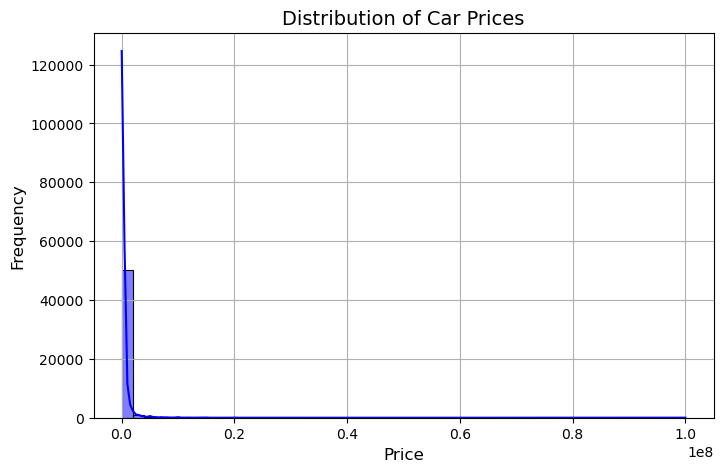

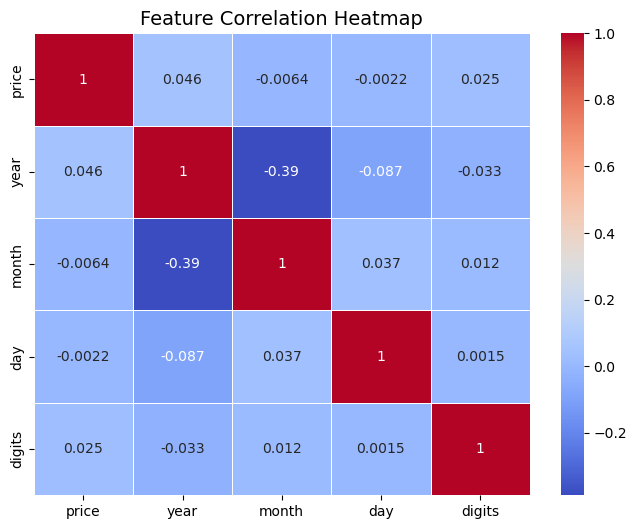

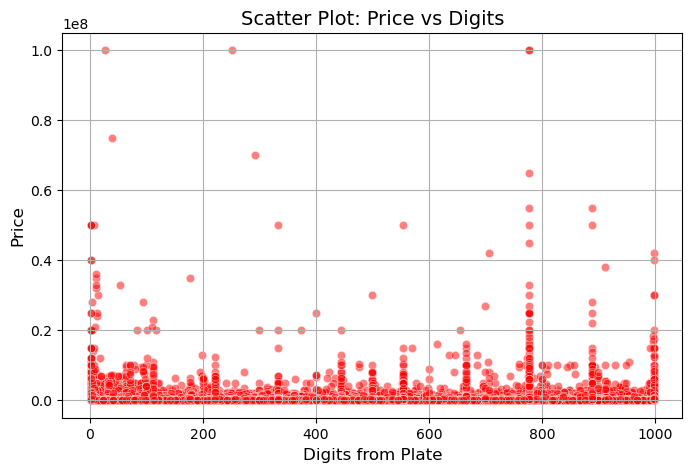

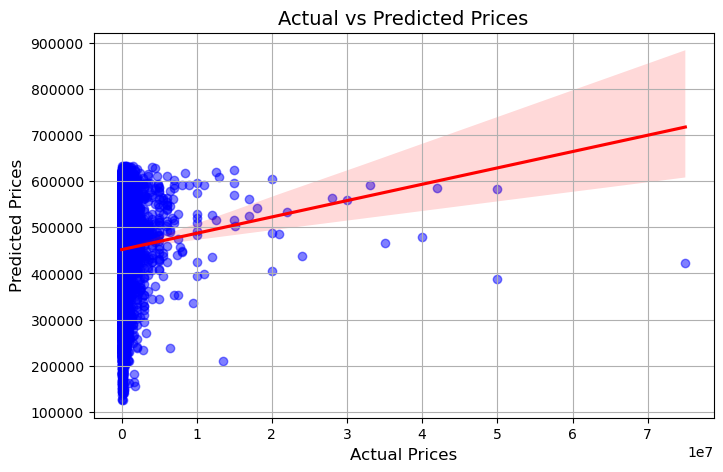

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load dataset
train_path = "train.csv"
train_df = pd.read_csv(train_path)

# Extract relevant numerical features
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day

# Extract numeric parts from 'plate'
train_df['digits'] = train_df['plate'].str.extract(r'(\d+)').astype(float)

# Drop unnecessary columns
train_df.drop(columns=['plate', 'date', 'id'], inplace=True)

# Define features and target
features = ['digits', 'year', 'month', 'day']
target = 'price'

X = train_df[features]
y = train_df[target]

# Train/Test Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_valid)

# ------------------ 📌 Data Visualization ------------------

# 1️⃣ **Distribution of Price**
plt.figure(figsize=(8, 5))
sns.histplot(train_df['price'], bins=50, kde=True, color='blue')
plt.title("Distribution of Car Prices", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()

# 2️⃣ **Correlation Heatmap**
plt.figure(figsize=(8, 6))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# 3️⃣ **Scatter Plot of Price vs. Digits**
plt.figure(figsize=(8, 5))
sns.scatterplot(x=train_df['digits'], y=train_df['price'], alpha=0.5, color="red")
plt.title("Scatter Plot: Price vs Digits", fontsize=14)
plt.xlabel("Digits from Plate", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(True)
plt.show()

# 4️⃣ **Linear Regression Line**
plt.figure(figsize=(8, 5))
sns.regplot(x=y_valid, y=y_pred, scatter_kws={"color": "blue", "alpha": 0.5}, line_kws={"color": "red"})
plt.title("Actual vs Predicted Prices", fontsize=14)
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.grid(True)
plt.show()
